# Social Network Analysis _ Marketing Purposes _ Identifiying Components _ Influencers _ Bridges 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statistics import mean

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
matrix = pd.read_csv('working_edges')

### First insights about the data 

In [11]:
matrix.head()

1    11553
0  1  8762940
1  1  8762941
2  1   688136
3  1  8762942
4  3   718952

In [12]:
matrix.shape

(40000, 2)

In [13]:
matrix.describe()

1         11553
count  4.000000e+04  4.000000e+04
mean   1.892926e+04  3.301096e+06
std    2.711250e+05  3.719873e+06
min    1.000000e+00  4.000000e+00
25%    3.682000e+03  1.688175e+04
50%    1.253200e+04  1.219048e+06
75%    1.689800e+04  8.763154e+06
max    8.771113e+06  8.771369e+06

In [14]:
numpy_matrix = matrix.to_numpy()

In [15]:
numpy_matrix

array([[      1, 8762940],
       [      1, 8762941],
       [      1,  688136],
       ...,
       [  19336, 8771368],
       [  19336, 1874040],
       [  19336, 8771369]], dtype=int64)

In [16]:
import networkx as nx

In [17]:
# Instantiate the graph
G1 = nx.Graph()
# add node/edge pairs
G1.add_edges_from(numpy_matrix)

In [18]:
G1.number_of_nodes()

31437

In [19]:
G1.number_of_edges()

40000

#   

### I will impelement some functions that will be used in needed cases

### 1) Degree Centrality 

#### Assumption: important nodes have many connections.
#### The most basic measure of centrality: number of neighbors.

In [20]:
def degree_centrality(G1):
    #Code to figure out the person who has the biggest number of neighbors 
    maximum = 0 
    node = 0
    degree_centrality = nx.degree_centrality(G1)
    for i in G1.nodes() : 
        if (degree_centrality[i]> maximum)  : 
            maximum = degree_centrality[i]
            node = i 
    #print(node)
    return node 

In [76]:
# def top_percent_degree_centrality(G1 , per = 0.1):
#     degree_centrality = nx.degree_centrality(G1)
# 
#     lis=[]
#     dic = dict(degree_centrality)
# 
#     #Top per of the data 
#     n= int(per * G1.number_of_nodes())
# 
#     for i in range (0,n) :
#         maximum = 0 
#         node = 0
#         for elt in dic : 
#             if dic[elt]> maximum  : 
#                 maximum = dic[elt]
#                 node = elt
#             
#         del dic[node]
#         lis.append(node)
#     lis_degree=lis
#     #print(lis_degree)
#     return lis_degree
def top_percent_degree_centrality(G1, per=0.1):
    degree_centrality = nx.degree_centrality(G1)
    sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)

    n = int(per * G1.number_of_nodes())
    top_nodes = sorted_nodes[:n]

    return top_nodes

### 2) Closeness centrality

#### Assumption: important nodes are close to other nodes.

In [22]:
def closeness_centrality(G1):
    maximum = 0 
    node = 0
    closeness_centrality = nx.closeness_centrality(G1)
    for i in G1.nodes() : 
        if closeness_centrality[i]> maximum  : 
            maximum = closeness_centrality[i]
            node = i 
    #print(node)
    return node 

In [23]:
def top_percent_closeness_centrality(G1 , per = 0.02 ):
    closeness_centrality = nx.closeness_centrality(G1)

    lis=[]
    dic = dict(closeness_centrality)

    #Top percent of the data 
    n= int(per * G1.number_of_nodes())

    for i in range (0,n) :
        maximum = 0 
        node = 0
        for elt in dic : 
            if dic[elt]> maximum  : 
                maximum = dic[elt]
                node = elt
            
        del dic[node]
        lis.append(node)
    lis_closeness=lis
    #print(lis_closeness)
    return lis_closeness

### 3) Betweenness Centrality

#### Assumption: important nodes connect other nodes.

In [24]:
def betweenness_centrality(G1):
    maximum = 0 
    node = 0
    betweenness_centrality = nx.betweenness_centrality(G1)
    for i in G1.nodes() : 
        if betweenness_centrality[i]> maximum  : 
            maximum = betweenness_centrality[i]
            node = i 
    #print(node)
    return node 

In [80]:
# def top_percent_betweenness_centrality(G1 , per = 0.02):
#     betweenness_centrality = nx.betweenness_centrality(G1)
# 
#     lis=[]
#     dic = dict(betweenness_centrality)
# 
#     #Top per of the data 
#     n= int(per * G1.number_of_nodes())
# 
#     for i in range (0,n) :
#         maximum = 0 
#         node = 0
#         for elt in dic : 
#             if dic[elt]> maximum  : 
#                 maximum = dic[elt]
#                 node = elt
#             
#         del dic[node]
#         lis.append(node)
#     lis_betweenness=lis
#     #print(lis_betweenness)
#     return lis_betweenness
def top_percent_betweenness_centrality(G1, per=0.02):
    betweenness_centrality = nx.betweenness_centrality(G1)
    sorted_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)

    n = int(per * G1.number_of_nodes())
    top_nodes = sorted_nodes[:n]

    return top_nodes


### 4) Functions about influency 

In [26]:
def polyvalent_influence (list1,list2,list3) :
    # Considering a person is a polyvalent influencer if he is among the top percent in the three classifications 
    
    return [x for x in list1 if x in list2 and x in list3]

In [27]:
def list_of_components (components) : 
    # list of lists where each list contain nodes of a single component 
    
    list_of_components=[]
    count = 0
    for com in components :
        list_nodes=list(com)
        list_of_components.append(list_nodes)
    
    return list_of_components

In [28]:
# function to calculate the avg of the three parameters of centrality for the k th community 

def extracting_graph_community (k,list_of_communities,numpy_matrix): 
    sample_array = np.array(numpy_matrix)

    list_edges_community_k = []
    for i in range(sample_array.shape[0]): 
        if sample_array[i][0] in list_of_communities[k] : 
            if sample_array[i][1] in list_of_communities[k] : 
                list_edges_community_k.append([sample_array[i][0],sample_array[i][1]])
            
    # creating an array of the k th community 
    sample_array=np.array(list_edges_community_k)

    # creating the G_sample graph of the k th community 
    
    # Instantiate the graph
    G_sample = nx.Graph()
    # add node/edge pairs
    G_sample.add_edges_from(sample_array)
    
    degree_centrality = nx.degree_centrality(G_sample)
    closeness_centralirty = nx.closeness_centrality(G_sample)
    betweenness_centrality = nx.betweenness_centrality(G_sample)
    
    avg_degree = mean(degree_centrality.values())
    avg_closeness = mean(closeness_centralirty.values())
    avg_betweenness = mean(betweenness_centrality.values())
    
    
    radius = nx.radius(G_sample)
    diameter = nx.diameter(G_sample)
    avg_shortest_path = nx.average_shortest_path_length(G_sample)
        
    
    
    smallest_bridge_number = nx.node_connectivity(G_sample)
    
    return (avg_degree,avg_closeness,avg_betweenness,radius,diameter,smallest_bridge_number,avg_shortest_path)

### Graph functions

In [29]:
def draw_graph (G_sample):
    # draw the network G1
    fig= plt.figure(figsize=(15,10))
    nx.draw_networkx(G_sample,with_labels=False,node_size=20,node_color='b')
    return 

In [87]:
# def color_list_of_nodes_in_graph (list1 , list2 , G ,node_size=40) :
#     # given a list of nodes it colors the list of nodes in blue and the rest in green 
#     color_map = []
#     for node in G.nodes() :
#         if node in list1 :
#             color_map.append('red')
#         elif node in list2 : 
#             color_map.append('green')
#         else: color_map.append('blue')
#     fig= plt.figure(figsize=(18,14))
#     nx.draw(G,node_color = color_map,with_labels=False,node_size=40,edge_color='Gray',alpha=0.9)
#     plt.show()
def color_list_of_nodes_in_graph(list1, list2, G, node_size=40):
    color_map = []
    for node in G.nodes():
        if node in list1:
            color_map.append('red')
        elif node in list2:
            color_map.append('green')
        else:
            color_map.append('blue')
    fig, ax = plt.subplots(figsize=(18, 14))  # Create both figure and axes objects
    nx.draw(G, node_color=color_map, with_labels=False, node_size=node_size, edge_color='gray', alpha=0.9, ax=ax)
    plt.show()

In [31]:
def color_list_of_nodes_in_graph_centrality (list1 , list2 , G , centrality) :
    # given a list of nodes it colors the list of nodes in blue and the rest in green 
    color_map = []
    size_map = []
    for node in G.nodes() :
        if node in list1 :
            color_map.append('red')
        elif node in list2 : 
            color_map.append('green')
        else: color_map.append('blue')
        
        size_map.append(int(exp(centrality[node]+1)*100))
        
    fig= plt.figure(figsize=(18,14))
    nx.draw(G,node_color = color_map,with_labels=False,node_size=size_map,edge_color='Gray',alpha=0.9)
    plt.show()

In [65]:
# def color_nodes (list) :
#     # given a list of nodes it colors the list of nodes in blue and the rest in green 
#     color_map = []
#     for node in G_sample :
#         if node in list :
#             color_map.append('red')
#         else: color_map.append('blue')
#     fig= plt.figure(figsize=(18,14))
#     node_style = {
#         'node_size': 18,
#         'edgecolors': 'Gray',  # Set the edge color of nodes
#         'node_color': color_map,   # Set the node color
#         'alpha': 0.8
#     }
#     nx.draw(G_sample,node_color = color_map,with_labels=False,node_size=18,edge_color='Gray',alpha=0.8)
#     plt.show()

def color_nodes(node_list):
    color_map = []
    for node in G_sample.nodes():
        if node in node_list:
            color_map.append('red')
        else:
            color_map.append('blue')

    # Create a new figure and axis
    fig, ax = plt.subplots(figsize=(18, 14))

    # Draw the graph with specified node colors and axis
    nx.draw(G_sample, node_color=color_map, with_labels=False, node_size=18, edge_color='Gray', alpha=0.8, ax=ax)

    # Show the plot
    plt.show()


In [33]:
def color_list_of_nodes_in_graph_centrality_weight (list1 , list2 , G , centrality) :
    # given a list of nodes it colors the list of nodes in blue and the rest in green 
    color_map = []
    size_map = []
    
    for node in G.nodes() :
        if node in list1 :
            color_map.append('red')
        elif node in list2 : 
            color_map.append('green')
        else: color_map.append('blue')
        
        size_map.append(int(exp(centrality[node]+1)*1000))
    
    edges , weights = zip(*nx.get_edge_attributes(G,'weight').items())
    
    listing = []
    for weight in weights : 
        listing.append(exp(weight+1)*1000)
    weight = tuple (listing)
    
    fig= plt.figure(figsize=(18,14))
    nx.draw(G,node_color = color_map,font_color ='white',edgelist=edges,edge_color=weight ,edge_cmap = plt.cm.Blues ,with_labels=True,node_size=size_map,alpha=0.9)
    plt.show()

### Analyzing the whole graph with some indicators 

##### 1584 is the biggest influencer of the whole graph

#   

### Extracting Components from the Data 

#### Rather than looking for influencers in all the graph we decide to focus on influencers on each component

In [34]:
nx.number_connected_components(G1)

1

In [35]:
components= sorted(nx.connected_components(G1), key=len, reverse=True)

In [36]:
list_of_components = list_of_components (components)

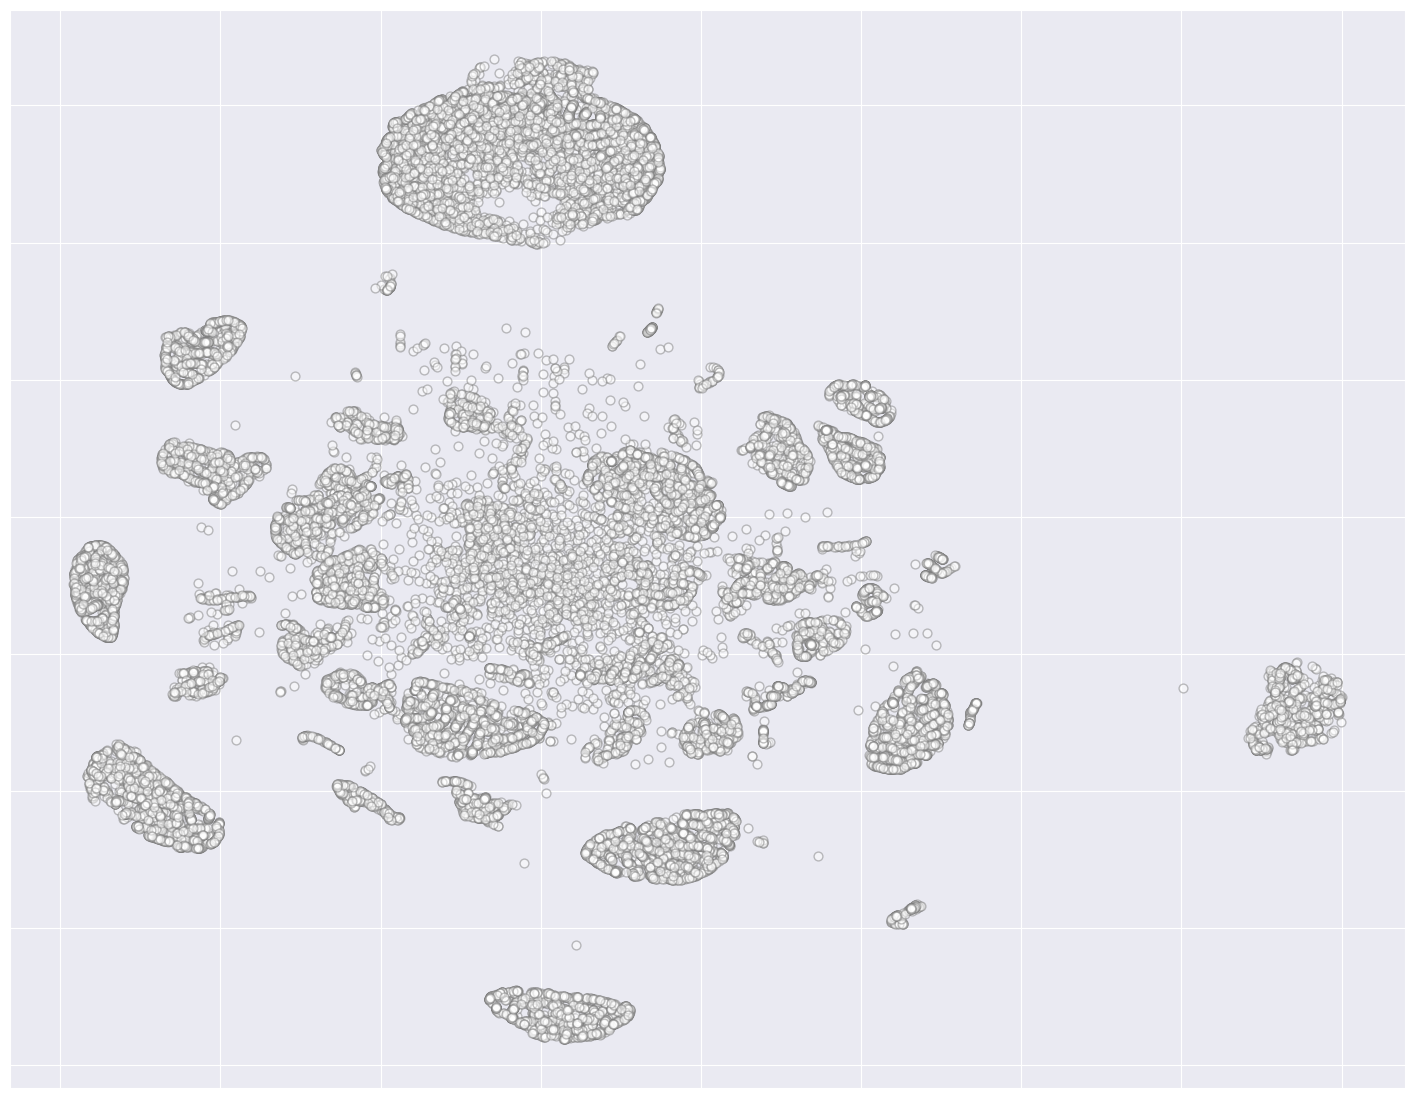

In [40]:
#drawing
size = float(nx.number_connected_components(G1))
pos = nx.spring_layout(G1)
count = 0.
fig= plt.figure(figsize=(18,14))

for com in components :
    count = count + 1.
    list_nodes = list(com)
    node_style = {
        'node_size': 40,
        'edgecolors': 'Gray',  # Set the edge color of nodes
        'node_color': str(count / size),   # Set the node color
        'alpha': 0.5
    }
    nx.draw_networkx_nodes(G1, pos, nodelist=list_nodes, **node_style)

#nx.draw_networkx_edges(G1, pos, alpha=0.5)
plt.show()

## A look on the communities 

### Details about communities 

In [41]:
list_of_degrees = []
list_of_closeness = [] 
list_of_betweenness = [] 

list_of_radius = [] 
list_of_diameter = [] 


list_of_number_of_bridges = [] 
list_of_smallest_bridge_number = []

list_of_avg_shortest_path = []

for k in range(0,len(list_of_components)) :
    tuple = extracting_graph_community (k,list_of_components,numpy_matrix)
    
    list_of_degrees.append(tuple[0])
    list_of_closeness.append(tuple[1])
    list_of_betweenness.append(tuple[2])
    
    list_of_radius.append(tuple[3])
    list_of_diameter.append(tuple[4])
    
    list_of_number_of_bridges.append(tuple[5])
    
    list_of_avg_shortest_path.append(tuple[6])

In [42]:
len(list_of_degrees)

1

In [43]:
len(list_of_diameter)

1

In [44]:
len(list_of_number_of_bridges)

1

In [45]:
# Size of each community
list_of_sizes = [len(com) for com in list_of_components]

In [46]:
list_of_ids = [i for i in range (0,len(list_of_number_of_bridges))]

In [47]:
len(list_of_ids)

1

In [48]:
dic = {'Community_Id' :list_of_ids , 'Community_Size' : list_of_sizes , 'Avg_Deg_Cent' : list_of_degrees , 'Avg_Clo_Cent' : list_of_closeness , 'Avg_Bet_Cent' : list_of_betweenness ,'Radius':list_of_radius,'Diameter': list_of_diameter, 'Number_Bridges' : list_of_number_of_bridges,'Avg_shortest_path':list_of_avg_shortest_path}

In [49]:
community_details = pd.DataFrame(dic)

In [50]:
community_details

Community_Id  Community_Size  Avg_Deg_Cent  Avg_Clo_Cent  Avg_Bet_Cent  \
0             0           31437      0.000081       0.26469      0.000089   

   Radius  Diameter  Number_Bridges  Avg_shortest_path  
0       3         6               1           3.792864

## A look on the biggest community on the Network 

### Turning to focusing on single community 

##### This time I will take the biggest community : with id : 7

In [51]:
sample_array=np.array(numpy_matrix)

In [52]:
# number of community
k = 0

In [53]:
# number of nodes in the k th community
len(list_of_components[k])

31437

In [54]:
list_eges_community_k = []
for i in range(sample_array.shape[0]): 
    if sample_array[i][0] in list_of_components[k] : 
        if sample_array[i][1] in list_of_components[k] : 
            list_eges_community_k.append([sample_array[i][0],sample_array[i][1]])

In [55]:
# creating an array of the k th community 
sample_array=np.array(list_eges_community_k)

In [56]:
# number of edges in the community 
sample_array.shape

(40000, 2)

In [62]:
# creating the G_sample graph of the k th community

# Instantiate the graph
G_sample = nx.Graph()
# add node/edge pairs
G_sample.add_edges_from(sample_array)

#### Looking for the influencers in one single community 

##### Finding the top 10 percent nodes in the centrality parameter classification 

#### Degree centrality 

In [63]:
List_degree_centrality = top_percent_degree_centrality(G_sample, per = 0.1)

In [64]:
degree_centrality = nx.degree_centrality(G_sample)

In [60]:
# best degree centrality 
degree_centrality[List_degree_centrality[0]]

0.27264919200916143

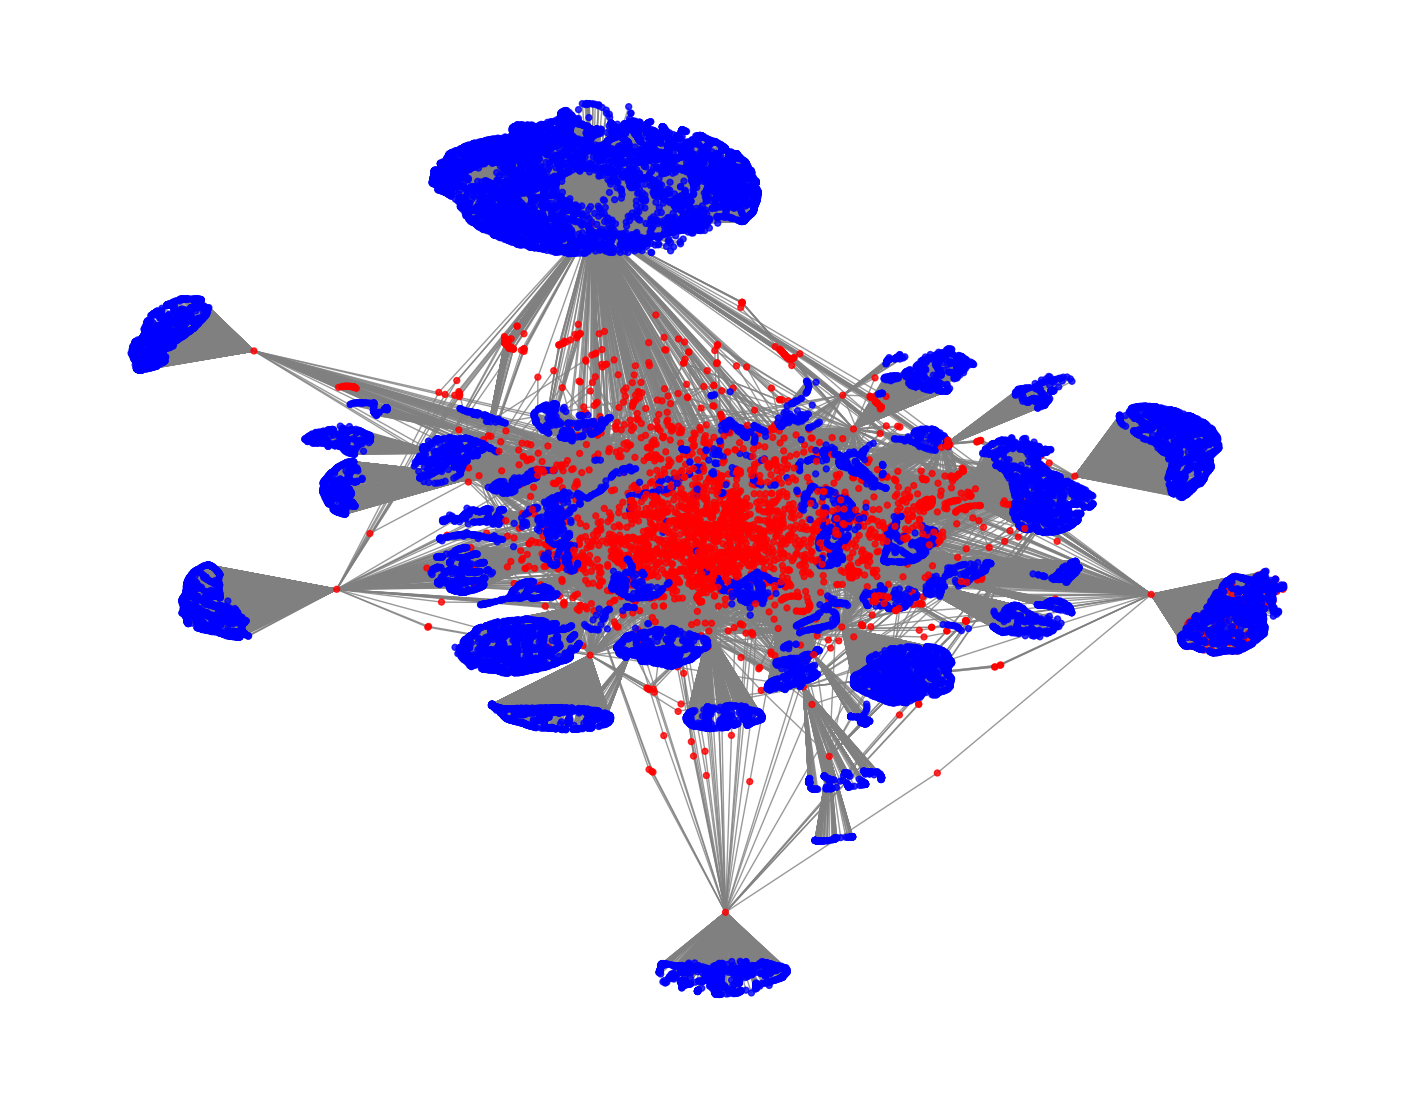

In [66]:
color_nodes(List_degree_centrality)

#### Closeness centrality 

In [67]:
List_closeness_centrality = top_percent_closeness_centrality(G_sample , per = 0.1)

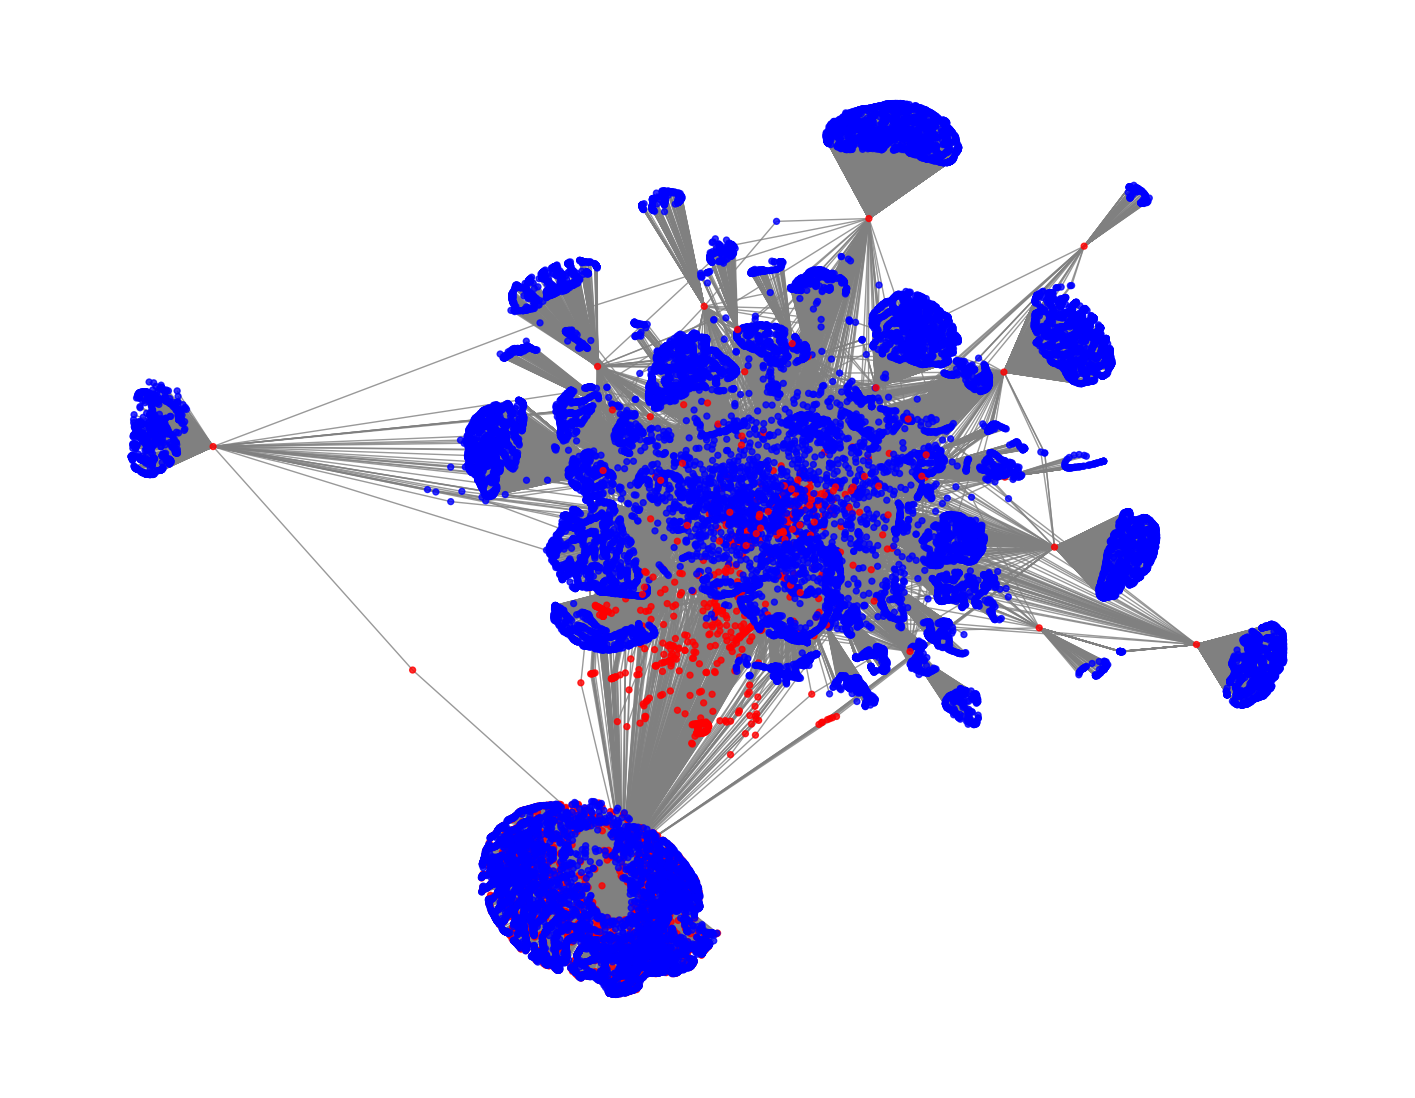

In [68]:
color_nodes(List_closeness_centrality)

#### Betweenness centrality 

In [81]:
List_betweenness_centrality = top_percent_betweenness_centrality(G_sample , per = 0.1)

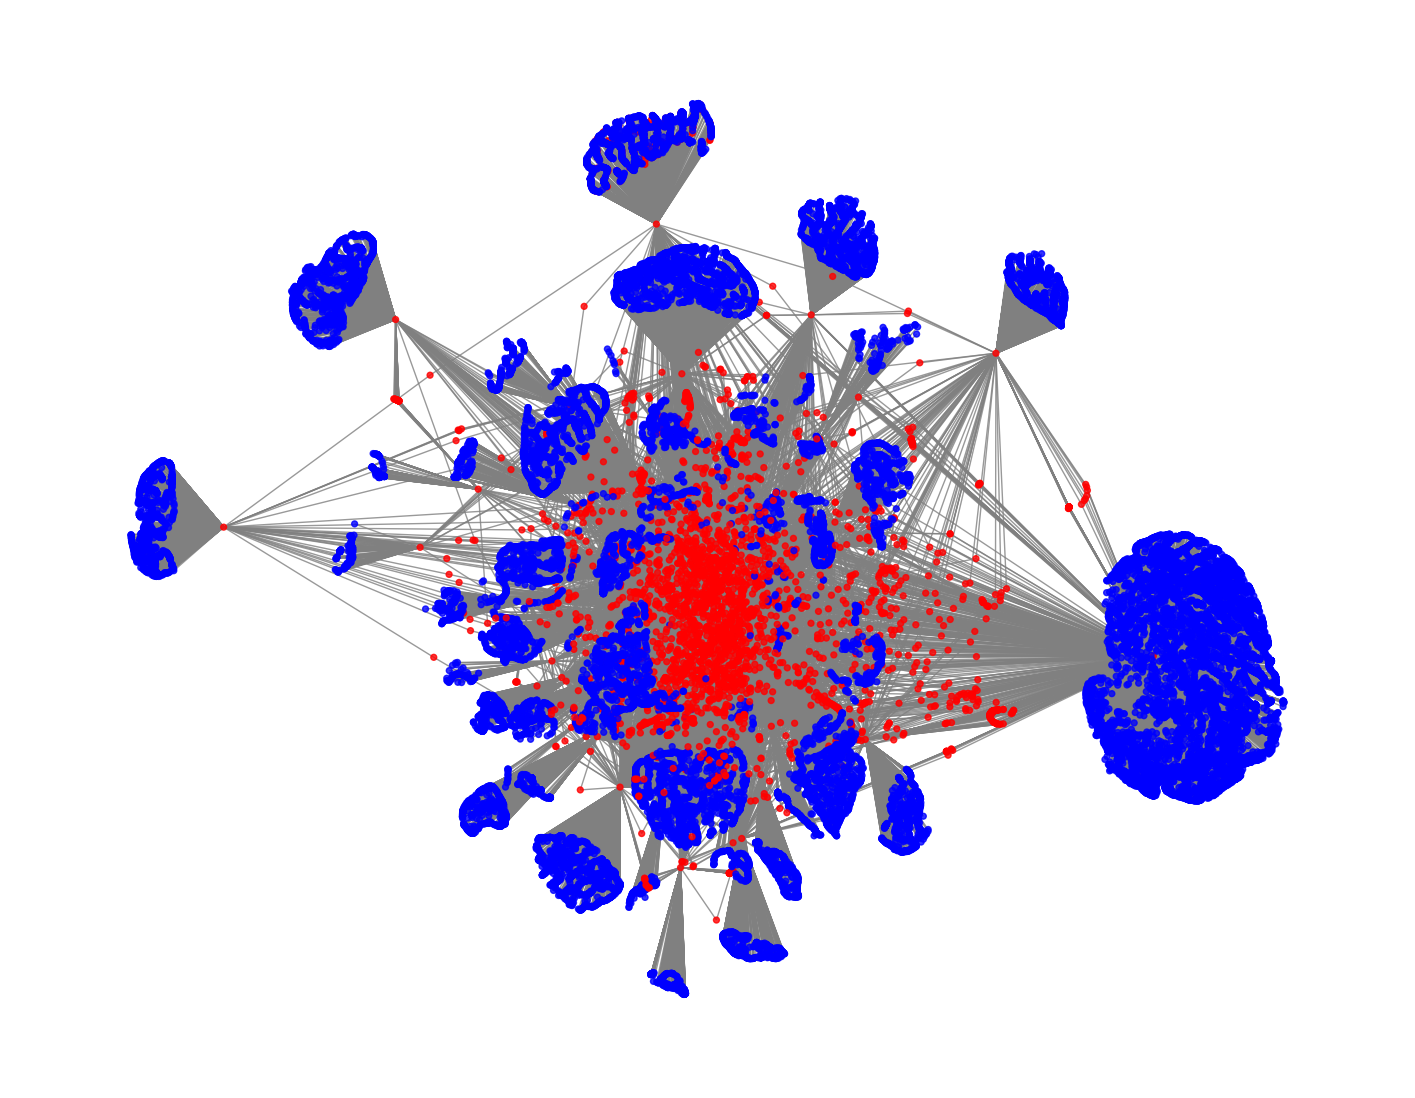

In [82]:
color_nodes(List_betweenness_centrality)

#### Centrality 

In [83]:
# The most influencers on the 7th community : 
List_centrality = [x for x in List_degree_centrality if x in List_closeness_centrality and x in List_betweenness_centrality]

In [84]:
List_centrality

[3682,
 41,
 2704,
 18838,
 17531,
 15574,
 1961,
 1745,
 18340,
 15427,
 15111,
 739,
 19045,
 16898,
 15202,
 12994,
 17362,
 12532,
 13722,
 13215,
 17420,
 2506,
 12604,
 18205,
 718,
 18633,
 2347,
 16998,
 13525,
 13655,
 12242,
 13472,
 12913,
 2622,
 19302,
 12372,
 12495,
 13392,
 18744,
 19336,
 13314,
 15553,
 12883,
 2669,
 1939,
 2598,
 18177,
 2695,
 17075,
 12476,
 18787,
 13982,
 13435,
 13522,
 12977,
 8762941,
 18812,
 15538,
 18183,
 13974,
 714,
 19040,
 13175,
 2450,
 12601,
 18988,
 13390,
 19000,
 20,
 14011,
 12370,
 2342,
 8762946,
 18323,
 3,
 38253,
 12852,
 16482,
 13518,
 645019,
 7831973,
 688136,
 2541,
 12912,
 697977,
 119217,
 1931522,
 8762942,
 69324,
 554038,
 696620,
 826396,
 19020,
 706345,
 90259,
 427258,
 15569,
 2778492,
 13206,
 54566,
 8762949,
 187028,
 18178,
 645614,
 191365,
 644988,
 736902,
 3109655,
 1374301,
 52828,
 141222,
 188707,
 16281,
 190589,
 148502,
 18203,
 645510,
 287853,
 124907,
 30517,
 693191,
 737,
 1188700,
 86572

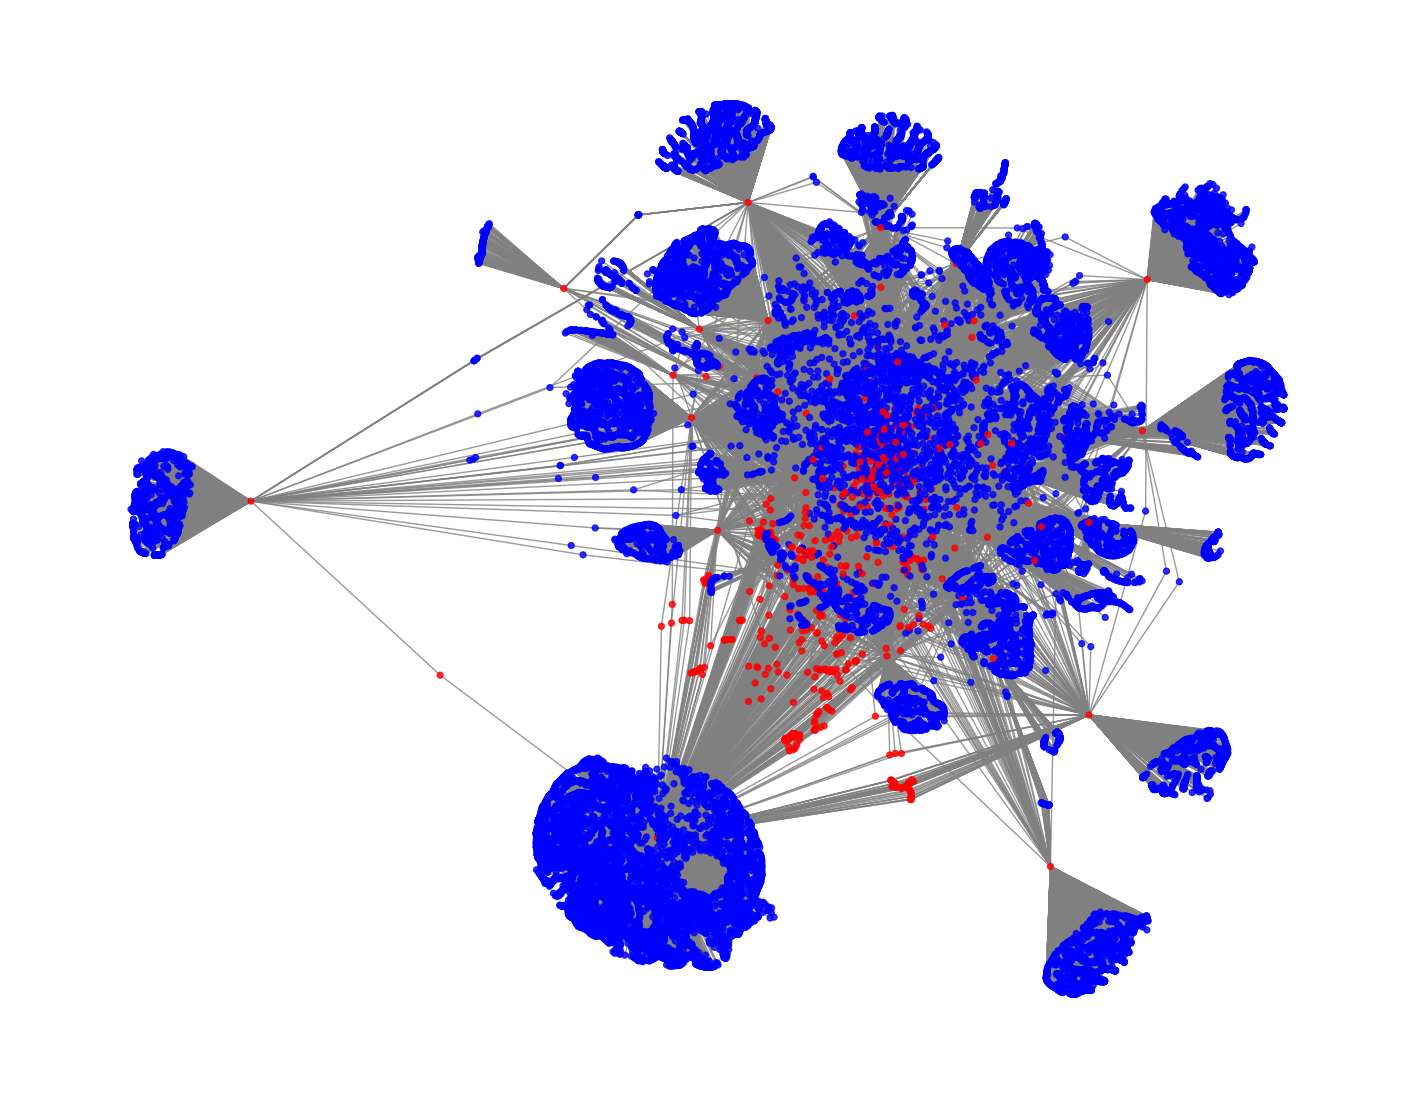

In [85]:
color_nodes(List_centrality)

#### Bridges 

In [71]:
# return a list of all node bridges 
bridges=[]
max = 0 
for elt in sorted(nx.bridges(G_sample)) : 
        if elt[0] > max : 
            max = elt[0]
            bridges.append(max)

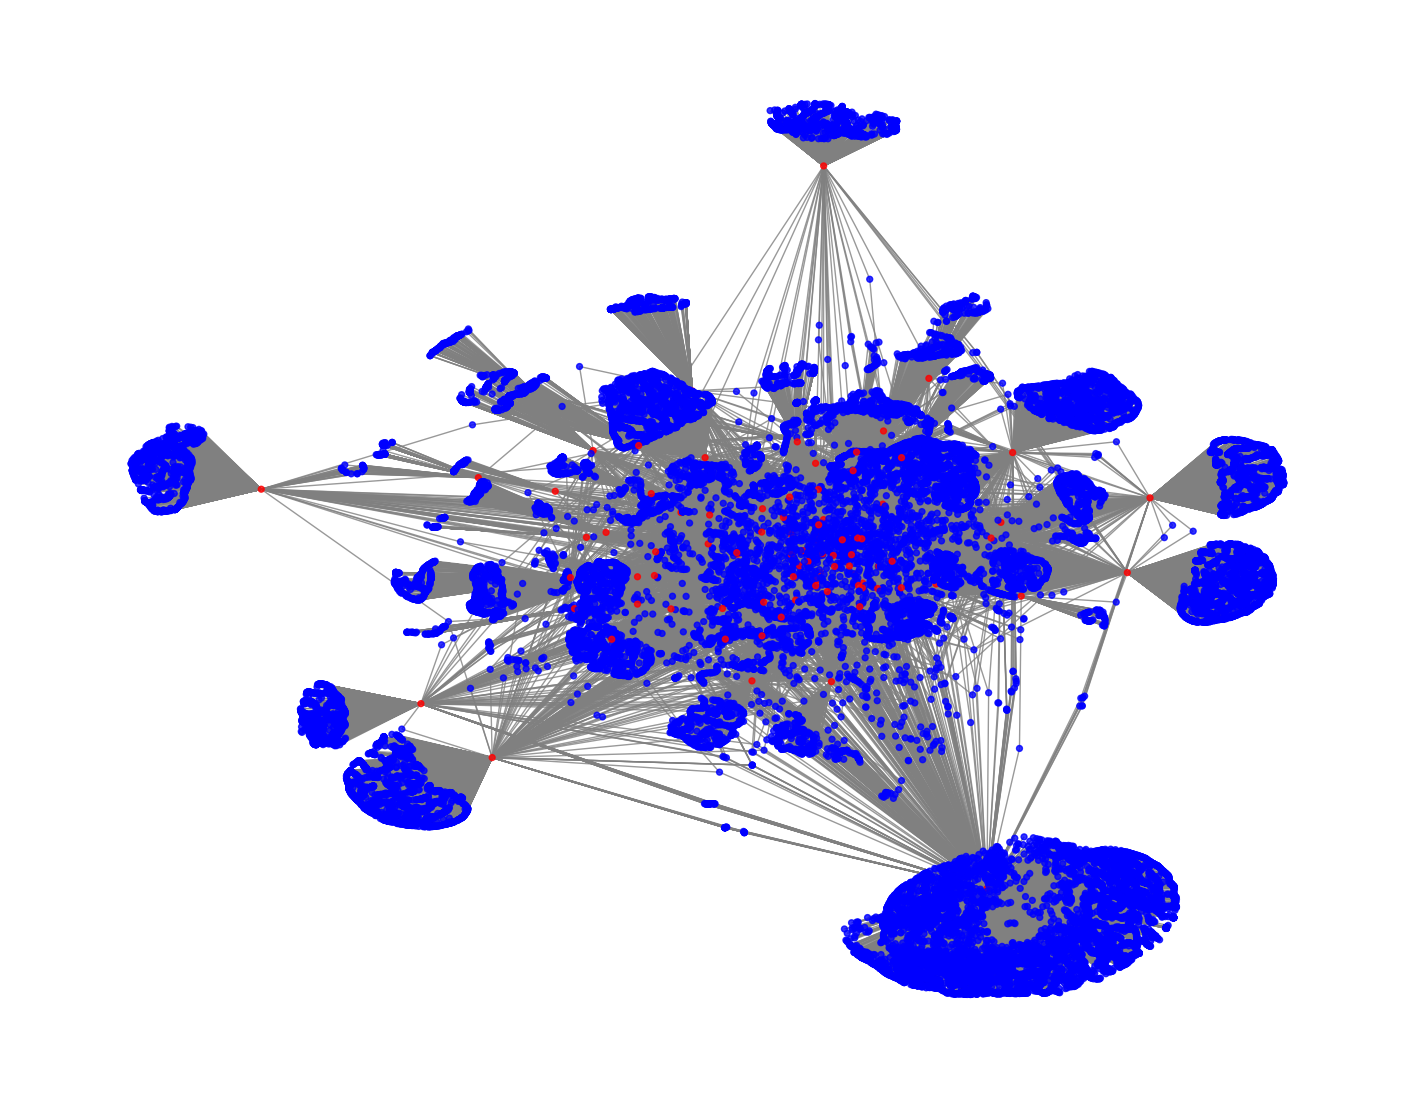

In [72]:
color_nodes(bridges)

#### Bridges and influencers 

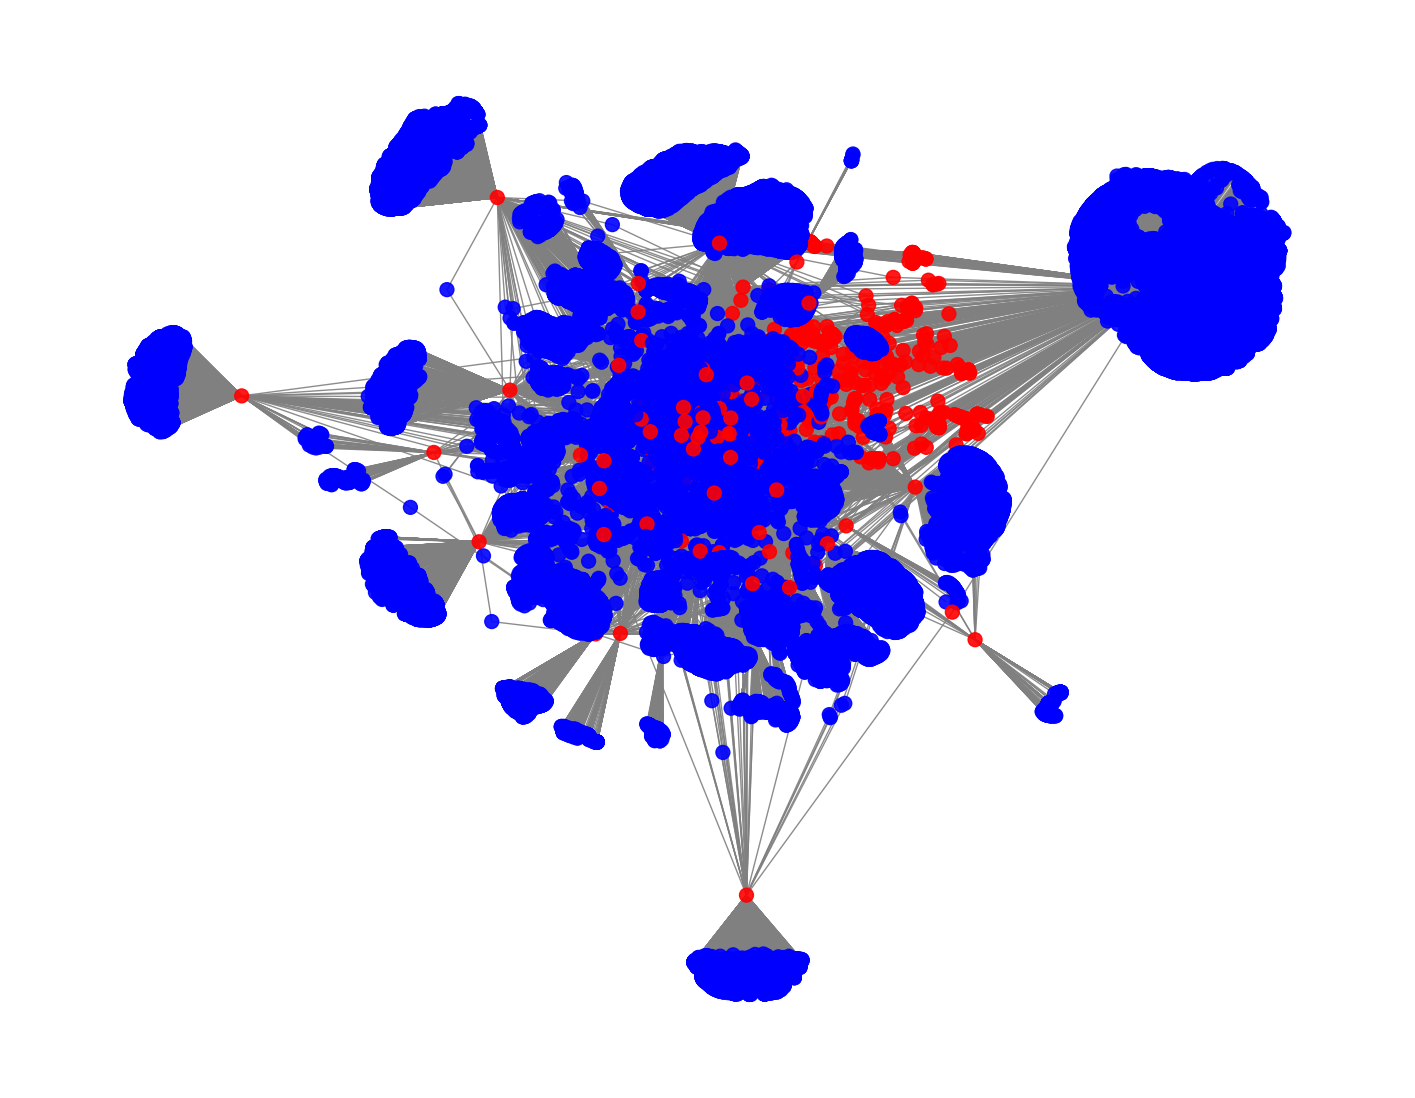

In [88]:
color_list_of_nodes_in_graph (List_centrality,bridges, G_sample ,node_size=100)